In [1]:
%matplotlib inline
import os

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.animation

In [3]:
os.mkdir('weights')

In [2]:
labels_path = '/home/alex/Projects/KagglePassenger/data/raw_data/stage1_labels.csv'
submission_template_path = '/home/alex/Projects/KagglePassenger/data/raw_data/stage1_sample_submission.csv'
data_path = '/home/alex/Projects/KagglePassenger/data/'
submission_path = '/home/alex/Projects/KagglePassenger/submission/'

In [3]:
def get_clean_dataframe_zones(path_to_csv):
    
    df = pd.read_csv(path_to_csv)
    zones_list = ['Zone' + str(i) for i in range(1,18)] 
    srtd_zones_list = sorted(zones_list)
    len_raw_labels_list = df.shape[0]
    id_list = [row[0] for row in df.loc[::17,'Id'].str.split('_')]
    clean_df = pd.DataFrame(index=id_list, columns=zones_list)
    
    for zone_number in range(1,18):
        s = list(range(srtd_zones_list.index('Zone' + str(zone_number)),len_raw_labels_list, 17))
        clean_df.loc[:,'Zone' + str(zone_number)] = df.iloc[s,1].values
    
    return clean_df

In [4]:
def plot_statistics_per_zones(dataframe):
    number_threats_per_zone = dataframe.sum()
    number_threats_per_zone.plot(kind='bar', title='Number of threats per zone')
    plt.ylabel('Number of threats')
    plt.xlabel('Zone')
    plt.show()
    
    frequency_threat_in_zone = number_threats_per_zone / len(dataframe)
    frequency_threat_in_zone.plot(kind='bar', title='Frequency of threats per zone in train')
    plt.ylabel('Frequency')
    plt.xlabel('Zone')
    plt.show()

In [5]:
def plot_statistics_per_object(dataframe):
    number_threats_per_object = dataframe.sum(1).value_counts().sort_values()
    number_threats_per_object.plot(kind='bar')
    plt.ylabel('Number of objects')
    plt.xlabel('Number of threats')
    plt.show()

In [8]:
train = get_clean_dataframe_zones(labels_path)

In [11]:
sample_submit = get_clean_dataframe_zones(submission_template_path)

#### Statistics of threats per zones 

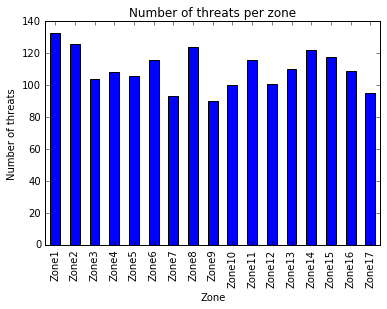

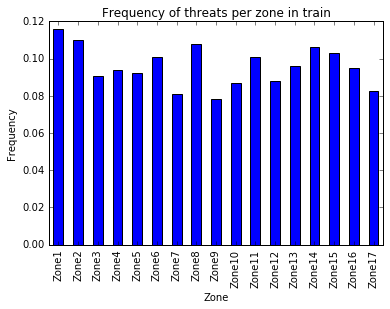

In [12]:
plot_statistics_per_zones(train)

#### Statistics of threats per object 

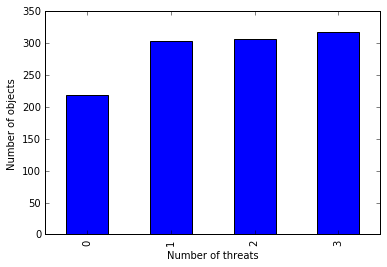

In [13]:
plot_statistics_per_object(train)

In [14]:
def make_submit_csv(pred_df, submit_path, file_name):
    submit_df = pd.DataFrame(columns=['Id', 'Probability'])
    z_list = list(pred_df.columns.values)

    for index, row in pred_df.iterrows():
        for zone in z_list:
            obj_id = str(index) + '_' + zone
            submit_df.loc[submit_df.shape[0]] = [obj_id, row[zone]]
    
    submit_df.to_csv(os.path.join(submit_path, file_name), index=False)

## Train / Validation partition 

In [84]:
x_train_names = train.index.values

In [85]:
Y_train_labels = train.values

In [86]:
X_train_names, X_val_names, Y_train_labels, Y_val_labels = train_test_split(x_train_names, 
                                                                            Y_train_labels, 
                                                                            test_size=147,
                                                                            random_state=42)

In [87]:
train_v2 = pd.DataFrame(index=X_train_names, columns=train.columns.values, data=Y_train_labels)

In [88]:
val = pd.DataFrame(index=X_val_names, columns=train.columns.values, data=Y_val_labels)

### Statistics train 

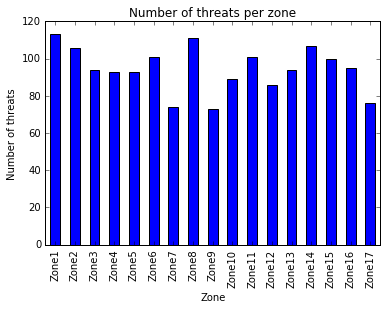

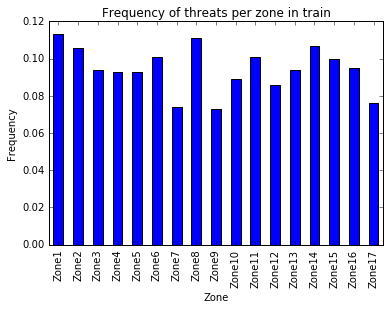

In [90]:
plot_statistics_per_zones(train_v2)

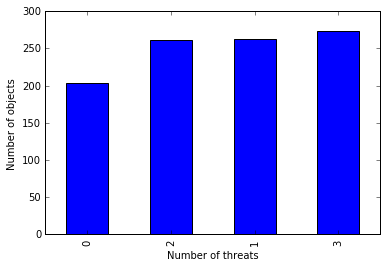

In [91]:
plot_statistics_per_object(train_v2)

### Statisitcs validation 

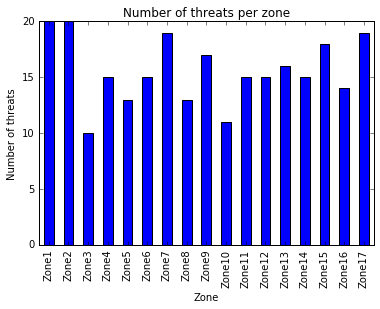

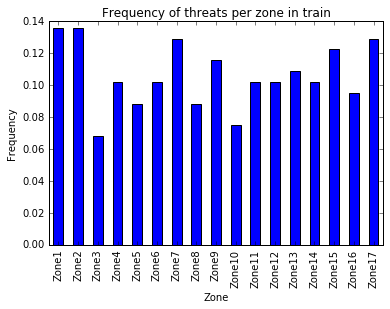

In [92]:
plot_statistics_per_zones(val)

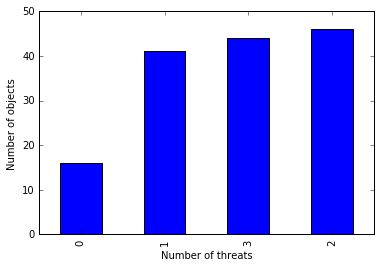

In [93]:
plot_statistics_per_object(val)

In [99]:
train_v2.to_csv(os.path.join(data_path, 'train_labels.csv'), index=True)
val.to_csv(os.path.join(data_path, 'val_labels.csv'), index=True)
sample_submit.to_csv(os.path.join(data_path, 'test_labels.csv'), index=True)

In [21]:
val = pd.read_csv(os.path.join(data_path, 'val_labels.csv'), index_col=0)

In [3]:
def read_header(infile):
    """Read image header (first 512 bytes)
    """
    h = dict()
    fid = open(infile, 'r+b')
    h['filename'] = b''.join(np.fromfile(fid, dtype = 'S1', count = 20))
    h['parent_filename'] = b''.join(np.fromfile(fid, dtype = 'S1', count = 20))
    h['comments1'] = b''.join(np.fromfile(fid, dtype = 'S1', count = 80))
    h['comments2'] = b''.join(np.fromfile(fid, dtype = 'S1', count = 80))
    h['energy_type'] = np.fromfile(fid, dtype = np.int16, count = 1)
    h['config_type'] = np.fromfile(fid, dtype = np.int16, count = 1)
    h['file_type'] = np.fromfile(fid, dtype = np.int16, count = 1)
    h['trans_type'] = np.fromfile(fid, dtype = np.int16, count = 1)
    h['scan_type'] = np.fromfile(fid, dtype = np.int16, count = 1)
    h['data_type'] = np.fromfile(fid, dtype = np.int16, count = 1)
    h['date_modified'] = b''.join(np.fromfile(fid, dtype = 'S1', count = 16))
    h['frequency'] = np.fromfile(fid, dtype = np.float32, count = 1)
    h['mat_velocity'] = np.fromfile(fid, dtype = np.float32, count = 1)
    h['num_pts'] = np.fromfile(fid, dtype = np.int32, count = 1)
    h['num_polarization_channels'] = np.fromfile(fid, dtype = np.int16, count = 1)
    h['spare00'] = np.fromfile(fid, dtype = np.int16, count = 1)
    h['adc_min_voltage'] = np.fromfile(fid, dtype = np.float32, count = 1)
    h['adc_max_voltage'] = np.fromfile(fid, dtype = np.float32, count = 1)
    h['band_width'] = np.fromfile(fid, dtype = np.float32, count = 1)
    h['spare01'] = np.fromfile(fid, dtype = np.int16, count = 5)
    h['polarization_type'] = np.fromfile(fid, dtype = np.int16, count = 4)
    h['record_header_size'] = np.fromfile(fid, dtype = np.int16, count = 1)
    h['word_type'] = np.fromfile(fid, dtype = np.int16, count = 1)
    h['word_precision'] = np.fromfile(fid, dtype = np.int16, count = 1)
    h['min_data_value'] = np.fromfile(fid, dtype = np.float32, count = 1)
    h['max_data_value'] = np.fromfile(fid, dtype = np.float32, count = 1)
    h['avg_data_value'] = np.fromfile(fid, dtype = np.float32, count = 1)
    h['data_scale_factor'] = np.fromfile(fid, dtype = np.float32, count = 1)
    h['data_units'] = np.fromfile(fid, dtype = np.int16, count = 1)
    h['surf_removal'] = np.fromfile(fid, dtype = np.uint16, count = 1)
    h['edge_weighting'] = np.fromfile(fid, dtype = np.uint16, count = 1)
    h['x_units'] = np.fromfile(fid, dtype = np.uint16, count = 1)
    h['y_units'] = np.fromfile(fid, dtype = np.uint16, count = 1)
    h['z_units'] = np.fromfile(fid, dtype = np.uint16, count = 1)
    h['t_units'] = np.fromfile(fid, dtype = np.uint16, count = 1)
    h['spare02'] = np.fromfile(fid, dtype = np.int16, count = 1)
    h['x_return_speed'] = np.fromfile(fid, dtype = np.float32, count = 1)
    h['y_return_speed'] = np.fromfile(fid, dtype = np.float32, count = 1)
    h['z_return_speed'] = np.fromfile(fid, dtype = np.float32, count = 1)
    h['scan_orientation'] = np.fromfile(fid, dtype = np.int16, count = 1)
    h['scan_direction'] = np.fromfile(fid, dtype = np.int16, count = 1)
    h['data_storage_order'] = np.fromfile(fid, dtype = np.int16, count = 1)
    h['scanner_type'] = np.fromfile(fid, dtype = np.int16, count = 1)
    h['x_inc'] = np.fromfile(fid, dtype = np.float32, count = 1)
    h['y_inc'] = np.fromfile(fid, dtype = np.float32, count = 1)
    h['z_inc'] = np.fromfile(fid, dtype = np.float32, count = 1)
    h['t_inc'] = np.fromfile(fid, dtype = np.float32, count = 1)
    h['num_x_pts'] = np.fromfile(fid, dtype = np.int32, count = 1)
    h['num_y_pts'] = np.fromfile(fid, dtype = np.int32, count = 1)
    h['num_z_pts'] = np.fromfile(fid, dtype = np.int32, count = 1)
    h['num_t_pts'] = np.fromfile(fid, dtype = np.int32, count = 1)
    h['x_speed'] = np.fromfile(fid, dtype = np.float32, count = 1)
    h['y_speed'] = np.fromfile(fid, dtype = np.float32, count = 1)
    h['z_speed'] = np.fromfile(fid, dtype = np.float32, count = 1)
    h['x_acc'] = np.fromfile(fid, dtype = np.float32, count = 1)
    h['y_acc'] = np.fromfile(fid, dtype = np.float32, count = 1)
    h['z_acc'] = np.fromfile(fid, dtype = np.float32, count = 1)
    h['x_motor_res'] = np.fromfile(fid, dtype = np.float32, count = 1)
    h['y_motor_res'] = np.fromfile(fid, dtype = np.float32, count = 1)
    h['z_motor_res'] = np.fromfile(fid, dtype = np.float32, count = 1)
    h['x_encoder_res'] = np.fromfile(fid, dtype = np.float32, count = 1)
    h['y_encoder_res'] = np.fromfile(fid, dtype = np.float32, count = 1)
    h['z_encoder_res'] = np.fromfile(fid, dtype = np.float32, count = 1)
    h['date_processed'] = b''.join(np.fromfile(fid, dtype = 'S1', count = 8))
    h['time_processed'] = b''.join(np.fromfile(fid, dtype = 'S1', count = 8))
    h['depth_recon'] = np.fromfile(fid, dtype = np.float32, count = 1)
    h['x_max_travel'] = np.fromfile(fid, dtype = np.float32, count = 1)
    h['y_max_travel'] = np.fromfile(fid, dtype = np.float32, count = 1)
    h['elevation_offset_angle'] = np.fromfile(fid, dtype = np.float32, count = 1)
    h['roll_offset_angle'] = np.fromfile(fid, dtype = np.float32, count = 1)
    h['z_max_travel'] = np.fromfile(fid, dtype = np.float32, count = 1)
    h['azimuth_offset_angle'] = np.fromfile(fid, dtype = np.float32, count = 1)
    h['adc_type'] = np.fromfile(fid, dtype = np.int16, count = 1)
    h['spare06'] = np.fromfile(fid, dtype = np.int16, count = 1)
    h['scanner_radius'] = np.fromfile(fid, dtype = np.float32, count = 1)
    h['x_offset'] = np.fromfile(fid, dtype = np.float32, count = 1)
    h['y_offset'] = np.fromfile(fid, dtype = np.float32, count = 1)
    h['z_offset'] = np.fromfile(fid, dtype = np.float32, count = 1)
    h['t_delay'] = np.fromfile(fid, dtype = np.float32, count = 1)
    h['range_gate_start'] = np.fromfile(fid, dtype = np.float32, count = 1)
    h['range_gate_end'] = np.fromfile(fid, dtype = np.float32, count = 1)
    h['ahis_software_version'] = np.fromfile(fid, dtype = np.float32, count = 1)
    h['spare_end'] = np.fromfile(fid, dtype = np.float32, count = 10)
    return h

In [4]:
def read_data(infile):
    """Read any of the 4 types of image files, returns a numpy array of the image contents
    """
    extension = os.path.splitext(infile)[1]
    h = read_header(infile)
    nx = int(h['num_x_pts'])
    ny = int(h['num_y_pts'])
    nt = int(h['num_t_pts'])
    fid = open(infile, 'rb')
    fid.seek(512) #skip header
    if extension == '.aps' or extension == '.a3daps':
        if(h['word_type']==7): #float32
            data = np.fromfile(fid, dtype = np.float32, count = nx * ny * nt)
        elif(h['word_type']==4): #uint16
            data = np.fromfile(fid, dtype = np.uint16, count = nx * ny * nt)
        data = data * h['data_scale_factor'] #scaling factor
        data = data.reshape(nx, ny, nt, order='F').copy() #make N-d image
    elif extension == '.a3d':
        if(h['word_type']==7): #float32
            data = np.fromfile(fid, dtype = np.float32, count = nx * ny * nt)
        elif(h['word_type']==4): #uint16
            data = np.fromfile(fid, dtype = np.uint16, count = nx * ny * nt)
        data = data * h['data_scale_factor'] #scaling factor
        data = data.reshape(nx, nt, ny, order='F').copy() #make N-d image
    elif extension == '.ahi':
        data = np.fromfile(fid, dtype = np.float32, count = 2* nx * ny * nt)
        data = data.reshape(2, ny, nx, nt, order='F').copy()
        real = data[0,:,:,:].copy()
        imag = data[1,:,:,:].copy()
    fid.close()
    if extension != '.ahi':
        return np.flipud(np.moveaxis(data.T, 0, -1))
    else:
        return real, imag

In [5]:
image = read_data('/home/alex/Projects/KagglePassenger/data/raw_data/a3daps/0043db5e8c819bffc15261b1f1ac5e42.a3daps')

In [6]:
image2 = read_data('/home/alex/Projects/KagglePassenger/data/raw_data/a3daps/f94dc7adc9caa23f65f7d28373dc35cc.a3daps')

In [7]:
image3 = read_data('/home/alex/Projects/KagglePassenger/data/raw_data/aps/6578189b2909138a987514791005ea35.aps')

In [8]:
image4 = read_data('/home/alex/Projects/KagglePassenger/data/raw_data/aps/fd3111f15da4a2052b2b50bfc5ef6465.aps')

In [9]:
def plot_ith_slice(image, i):
    fig = plt.figure(figsize = (12,12))
    ax = fig.add_subplot(111)
    ax.imshow(image[:,:,i], cmap='gray')
    plt.show()

In [15]:
channels = 64
np.arange(0, channels, channels // 4)

array([ 0, 16, 32, 48])

In [29]:
def convert_image_to_4_angles(image, channels):
    result = image[:,:,np.arange(0, channels, channels // 4)]
    for i in range(4):
        imin = result[:,:,i].min()
        imax = result[:,:,i].max()
        if (imax - imin) != 0:
            result[:,:,i] = (result[:,:,i] - imin) / (imax - imin)
        else:
            result[:,:,i] = 0
    return result

In [18]:
img = convert_image_to_4_angles(image2, 64)

In [30]:
img2 = convert_image_to_4_angles(image3, 16)

In [32]:
img2[:,:,0].min()

0.0

In [33]:
img2[:,:,0].max()

1.0

In [34]:
img2.max()

1.0

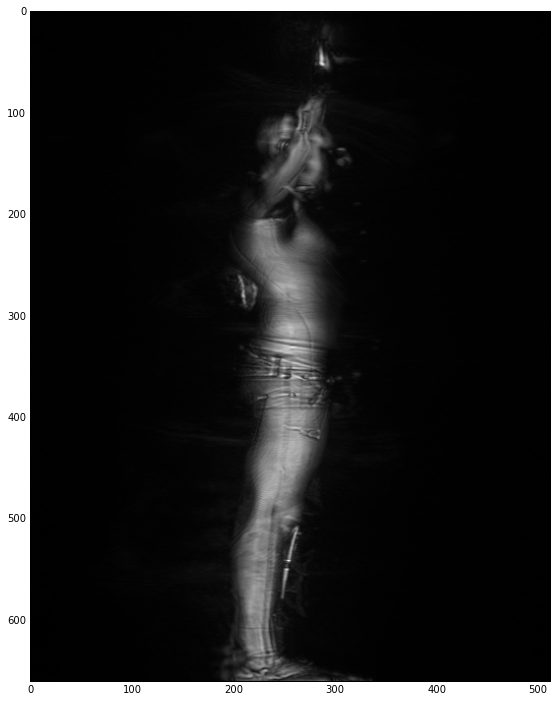

In [31]:
plot_ith_slice(img2, 3)

In [55]:
test_names = val.index.values[:10]
test_labels = val.values[:10]

In [42]:
raw_path = '/home/alex/Projects/KagglePassenger/data/raw_data/a3daps'

In [64]:
def batch_generator(names, labels, batch_size):
    count = 0
    number_of_batches = len(names) // batch_size
    
    while True:
        batch_names = names[count*batch_size:batch_size*(count+1)]
        batch_labels = labels[count*batch_size:batch_size*(count+1)]
        image_list = []
        
        for file_name in batch_names:
            image = read_data(os.path.join(raw_path, file_name + '.a3daps'))
            image_list.append(image)
        count += 1
        yield  batch_names , np.array(image_list), batch_labels
        
        if count == number_of_batches:
            idx = np.arange(len(names))
            np.random.shuffle(idx)
            names = names[idx]
            labels = labels[idx]
            count = 0
            